# Problem Statement 7
## Build a Python application to classify iris flowers using the Nearest Neighbor Rule. Use a given dataset with features such as petal length and width. Experiment with different values of K and evaluate the model's accuracy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [4]:
iris = datasets.load_iris()
X = iris.data[:, 2:4] # Using petal Length & petal width for better visual decision boundaries
y = iris.target
print("Feature shape:", X.shape)
print("Target classes:", np.unique(y))

Feature shape: (150, 2)
Target classes: [0 1 2]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
k_values = [1, 3, 5, 7, 9]
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Accuracy for k = {k}: {acc:.2f}")

Accuracy for k = 1: 1.00
Accuracy for k = 3: 1.00
Accuracy for k = 5: 1.00
Accuracy for k = 7: 1.00
Accuracy for k = 9: 1.00


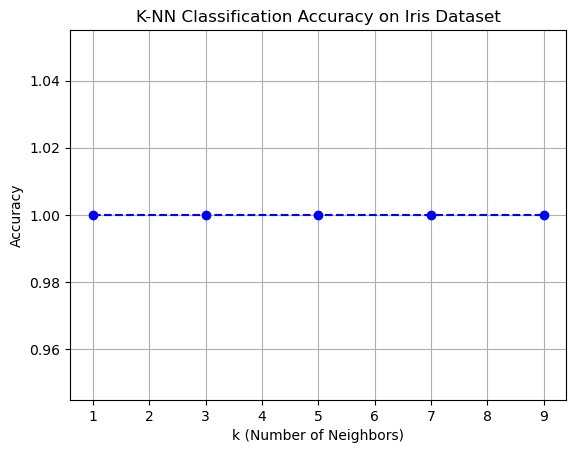

In [10]:
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.title("K-NN Classification Accuracy on Iris Dataset")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

=== Classification Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

=== Confusion Matrix ===


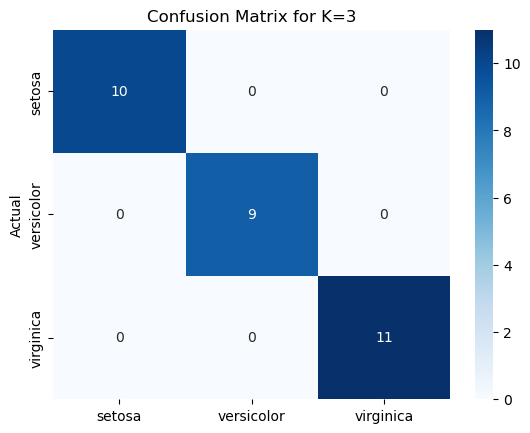

In [12]:
best_k = 3
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)
print("=== Classification Report ===")
print(classification_report(y_test, y_pred_best, target_names=iris.target_names))
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred_best)
plt.xlabel("Predicted")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.ylabel("Actual")
plt.title(f"Confusion Matrix for K={best_k}")
plt.show()

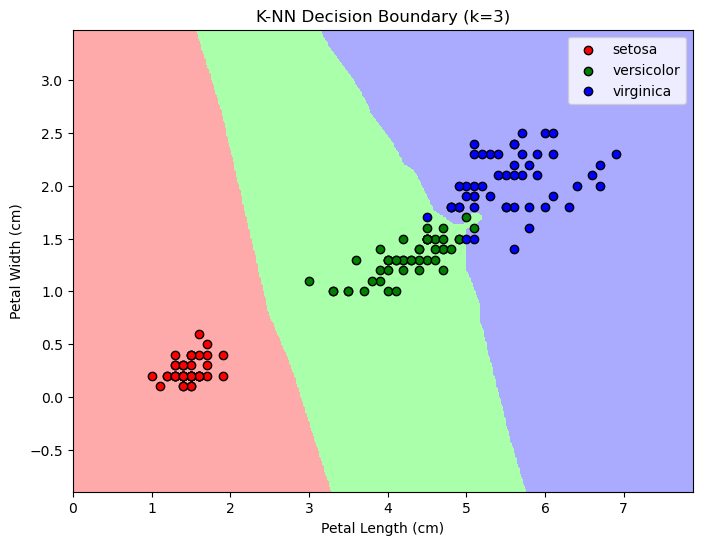

In [20]:
# Visualize Decision Boundaries (Optional)
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    h = .02 # step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['red', 'green', 'blue']

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    for i, color in zip(np.unique(y), cmap_bold):
        plt.scatter(X[y==i, 0], X[y == i, 1], c=color, label=iris.target_names[i], edgecolor='k')
    plt.xlabel("Petal Length (cm)")
    plt.ylabel("Petal Width (cm)")
    plt.title(f"K-NN Decision Boundary (k={k})")
    plt.legend()
    plt.show()

plot_decision_boundary(X, y, k=3)